In [12]:
import matplotlib.pyplot as plt
import torch

import sys
sys.path.append("../")

from prototype.user_profile_host import UserProfileHost
from prototype.constants import RecommendationType
from prototype.user_profile_host.utils import display_generated_points_user_profile_2d

In [13]:
# Fit TSNE Representation Module from sklearn
toy_uph = UserProfileHost(original_prompt='test', recommendation_type=RecommendationType.WEIGHTED_AXES, cache_dir='../cache/')

# Run a few iterations to gather some points
for i in range(100):
    embeds, latents = toy_uph.generate_recommendations(num_recommendations=5)
    scores = torch.rand(size=(5,))
    toy_uph.fit_user_profile(preferences=scores)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# TSNE transformation

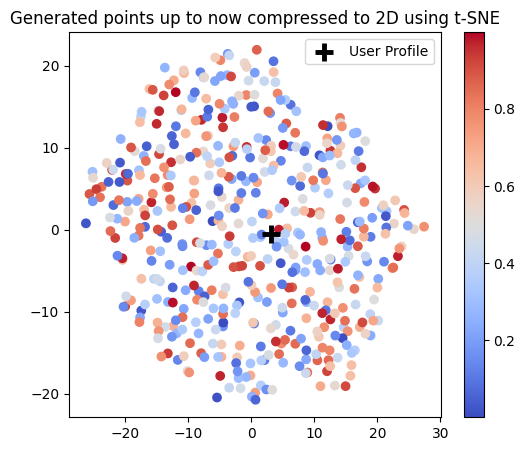

In [14]:
low_d_user_profile, low_d_embeddings, preferences = toy_uph.plotting_utils(algorithm='tsne')

display_generated_points_user_profile_2d(low_d_embeddings=low_d_embeddings, preferences=preferences, low_d_user_profile=low_d_user_profile, compression_technique='t-SNE', save_path="../prototype/output/")

# PCA transformation

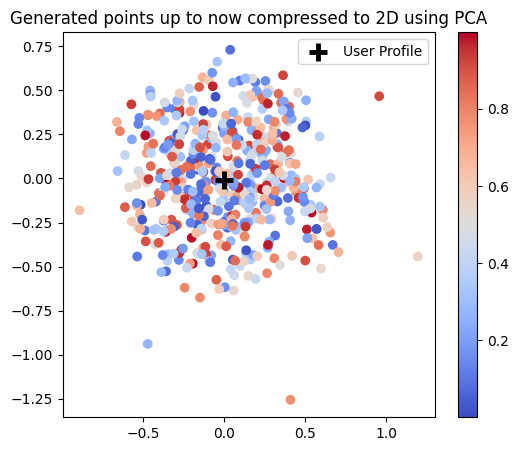

In [15]:
low_d_user_profile, low_d_embeddings, preferences = toy_uph.plotting_utils(algorithm='pca')

display_generated_points_user_profile_2d(low_d_embeddings=low_d_embeddings, preferences=preferences, low_d_user_profile=low_d_user_profile, compression_technique='PCA', save_path="../prototype/output/")